In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [2]:
## Inputs
data_dir = '/Users/scottmatthewssalmon/Desktop/github/CCFatigue/Outputs'
filename = 'Vahid_std.csv'
filepath = os.path.join(data_dir,filename)

df = pd.read_csv(filepath, decimal = ",")
print(df)

       Machine_Displacement Machine_N_cycles  DIC_index  DIC_N_cycles  \
0                  0.001037              1.0        NaN           NaN   
1                  0.001262              1.0        NaN           NaN   
2                  0.001392              1.0        NaN           NaN   
3                  0.001506              1.0        NaN           NaN   
4                  0.001541              1.0        NaN           NaN   
...                     ...              ...        ...           ...   
29895              0.009387        1197000.0        NaN           NaN   
29896              0.009945        1197000.0        NaN           NaN   
29897              0.010576        1197000.0        NaN           NaN   
29898              0.011272        1197000.0        NaN           NaN   
29899              0.011516        1197000.0        NaN           NaN   

       DIC_exy  DIC_exx  DIC_crack_length  Th_time  DIC_eyy  Th_specimen_max  \
0          NaN      NaN               NaN  

In [13]:
## Plotting plot Stress - Strain

def plot_stress_strain(df):
    plt.figure(0)
    plt.title("Stress - Strain")
    plt.xlabel("Strain")
    plt.ylabel("Stress")
    plt.plot(df.Machine_Displacement, df.Machine_Load)
print(plot_stress_strain(df))

TypeError: nan is not a string

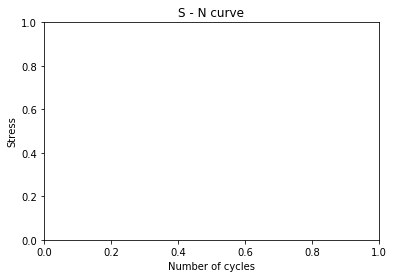

In [14]:
## Plotting plot S - N curve

def plot_SN_curve(df):
    plt.figure(1)
    plt.title("S - N curve")
    plt.xlabel("Number of cycles")
    plt.ylabel("Stress")
    plt.plot(df.Machine_N_cycles, df.Machine_Load)
print(plot_SN_curve(df))

In [ ]:
save_dir = 

function to save plots!